# Time in Space

<br>

### Imports

In [37]:
import pandas as pd
import numpy as np
import json

import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import seaborn as sns

import FEAutils as hlp
from IPython.display import JSON

<br>

### User Inputs

In [17]:
raw_data_dir = '../data/raw'

<br>

### Loading Data

In [18]:
with open(f'{raw_data_dir}/astro_db.json', 'r') as fp:
    astronauts_db = json.load(fp)
    
JSON(astronauts_db)

<IPython.core.display.JSON object>

<br>

### Extracting Time in Space

In [32]:
s_space_time = (pd
                .Series({
                    astronaut['name']: astronaut['totalMinutesInSpace'] 
                    for astronaut 
                    in astronauts_db['astronauts'] 
                    if 'totalMinutesInSpace' in astronaut.keys()
                })
                .replace(0, np.nan)
                .dropna()
                .sort_values()
                /(60*24)
               )

s_space_time

William B. Binnie       0.003472
Mark P. Stucky          0.003472
David W. D. Mackay      0.003472
Beth Moses              0.003472
Mike Masucci            0.003472
                         ...    
Sergei Avdeyev        747.593056
Aleksandr Kaleri      769.275694
Sergei Krikalev       803.402083
Yuri Malenchenko      827.388889
Gennady Padalka       878.479861
Length: 570, dtype: float64

<br>

We can also visualise these as a logged histogram

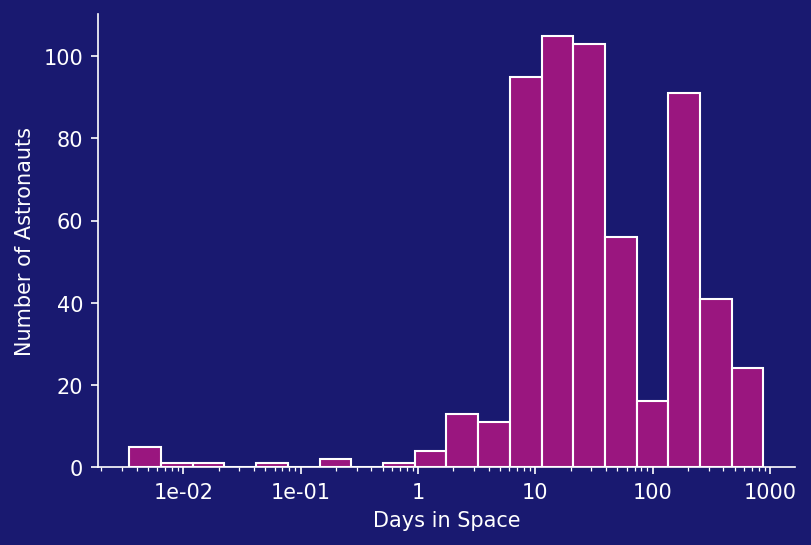

In [62]:
with plt.style.context('dark_background'):
    fig, ax = plt.subplots(dpi=150, facecolor='midnightblue')
    ax.set_facecolor('midnightblue')

    sns.histplot(s_space_time, ax=ax, log_scale=True, color='mediumvioletred')

    hlp.hide_spines(ax)
    ax.set_xlabel('Days in Space')
    ax.set_ylabel('Number of Astronauts')
    ax.xaxis.set_major_formatter(mticker.LogFormatter())